In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('financial_source.xlsx',sheet_name='Quarter Source')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Year                         18 non-null     datetime64[ns]
 1   Revenue                      18 non-null     int64         
 2   Gross Profit                 18 non-null     int64         
 3   Operating Profit             18 non-null     int64         
 4   Profit Before Tax            18 non-null     int64         
 5   Net Profit                   18 non-null     int64         
 6   Cost of Sales                18 non-null     int64         
 7   Total Assets                 18 non-null     int64         
 8   Total Liabilities            18 non-null     int64         
 9   Total ShareHolder's Equity   18 non-null     int64         
 10  Current Assets               18 non-null     int64         
 11  Current Liabilities          18 non-null     in

In [12]:
df['year_no'] = df['Year'].dt.year

profit_df =  df.groupby('year_no').agg(
    total_op=('Operating Profit','sum'),
    total_gp=('Gross Profit','sum'),
    total_np=('Net Profit','sum')
)

profit_df = profit_df.sort_values(by='year_no')
profit_df.reset_index(inplace=True)
profit_df

,year_no,total_op,total_gp,total_np
0,2020,309043,407398,266677
1,2021,373686,441149,316771
2,2022,425091,467501,400456
3,2023,585698,608429,486140
4,2024,380243,391555,321546


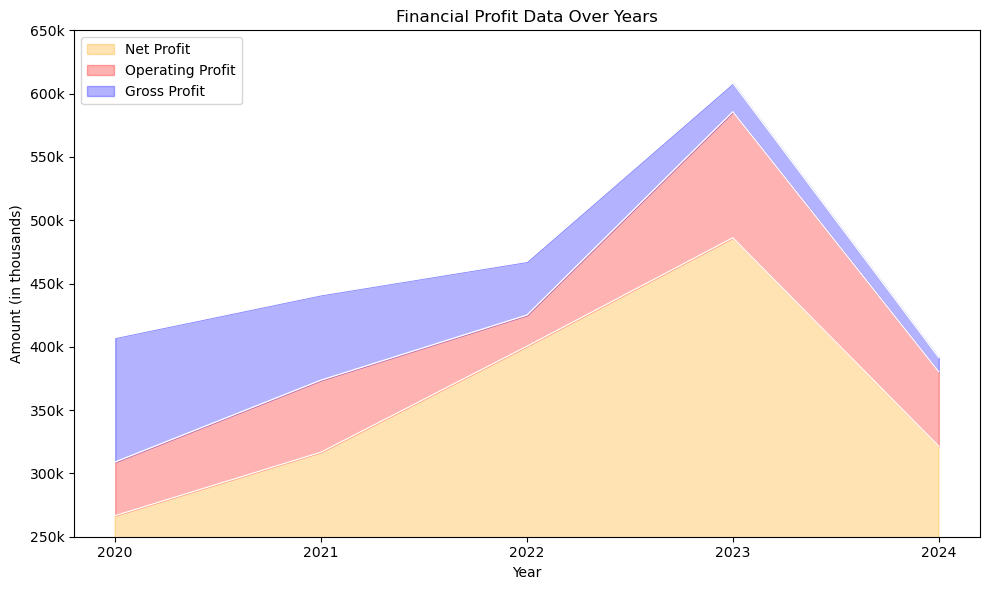

In [35]:
plt.figure(figsize=(10, 6))

fill_properties = [
    ('total_np', 'orange', 'Net Profit'),
    ('total_op', 'red', 'Operating Profit'),
    ('total_gp', 'blue', 'Gross Profit')
]

# Plot the areas using fill_between
for i, (column, color, label) in enumerate(fill_properties):
    # Use the cumulative sum of previous areas for proper stacking
    if i == 0:
        plt.fill_between(profit_df['year_no'], profit_df[column], color=color, label=label, alpha=0.3)
    else:
        plt.fill_between(profit_df['year_no'], profit_df[column], 
                         profit_df[fill_properties[i-1][0]], color=color, label=label, alpha=0.3)
    plt.plot(profit_df['year_no'], profit_df[column], color='white', linewidth=1)

# Set x-ticks to show each year without duplicates
plt.xticks(profit_df['year_no'], profit_df['year_no'])

# Format the y-axis to use 'k' for thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x/1000:.0f}k'))
# Limit y-axis range
plt.ylim(250000,650000)

# Add title, labels, and legend
plt.title('Financial Profit Data Over Years')
plt.xlabel('Year')
plt.ylabel('Amount (in thousands)')
plt.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()